mAP_Train:
[ScalarEvent(wall_time=1527247577.9148293, step=0, value=0.0), ScalarEvent(wall_time=1527247819.0355628, step=1, value=0.008033215068280697), ScalarEvent(wall_time=1527248059.1474047, step=2, value=0.024217704311013222), ScalarEvent(wall_time=1527248299.4185057, step=3, value=0.05336245521903038), ScalarEvent(wall_time=1527248552.573692, step=4, value=0.07205244153738022), ScalarEvent(wall_time=1527248791.7954328, step=5, value=0.07904698699712753), ScalarEvent(wall_time=1527249030.5517368, step=6, value=0.09081869572401047), ScalarEvent(wall_time=1527249268.9753397, step=7, value=0.10801131278276443), ScalarEvent(wall_time=1527249507.6621745, step=8, value=0.12288906425237656), ScalarEvent(wall_time=1527249750.370572, step=9, value=0.13973356783390045), ScalarEvent(wall_time=1527249988.8613298, step=10, value=0.16176091134548187), ScalarEvent(wall_time=1527250227.042554, step=11, value=0.1801506131887436), ScalarEvent(wall_time=1527250465.847072, step=12, value=0.1918643563

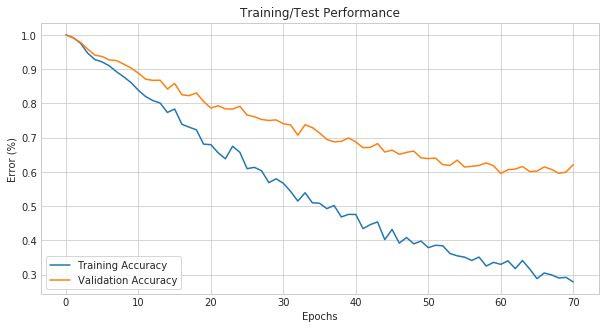

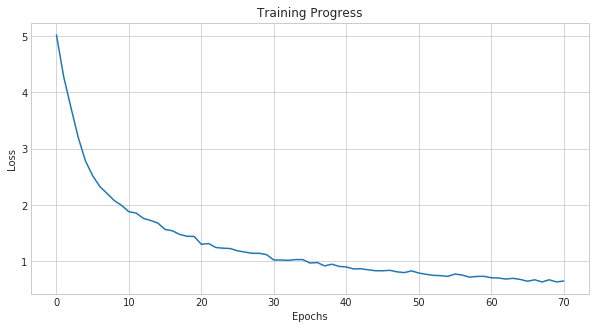

In [177]:
import os
#Modified from https://gist.github.com/tomrunia/1e1d383fb21841e8f144
import numpy as np
#from tensorflow.python.summary.event_accumulator import EventAccumulator
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

BASE_DIR = os.getcwd()
LOG_FILE = os.path.join(BASE_DIR, 'logs', 'events.out.tfevents.1527247328.deep-traffic-v2')

# Loading too much data is slow...
tf_size_guidance = {
    'compressedHistograms': 10,
    'images': 0,
    'scalars': 100,
    'histograms': 1
}

event_acc = EventAccumulator(LOG_FILE, tf_size_guidance)
event_acc.Reload()

# Show all tags in the log file
#print(event_acc.Tags())

training_accuracies = event_acc.Scalars('mAP_train')
test_accuracies = event_acc.Scalars('mAP_test')
loss = event_acc.Scalars('loss')

print("mAP_Train:")
print(training_accuracies)
print("mAP_Test:")
print(test_accuracies)
print("loss:")
print(loss)

steps = len(training_accuracies)
x = np.arange(steps)
y = np.zeros([steps, 3])

for i in range(steps):
    y[i, 0] = (1-training_accuracies[i][2])
    y[i, 1] = (1-test_accuracies[i][2])
    y[i, 2] = loss[i][2]

#Plot Train/Test
plt.figure(figsize=(10,5))
plt.plot(x, y[:,0], label='Training Accuracy')
plt.plot(x, y[:,1], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Error (%)")
plt.title("Training/Test Performance")
plt.legend(loc='lower left', frameon=True)
plt.show()

#Plot Loss
plt.figure(figsize=(10,5))
plt.plot(x, y[:,2])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Progress")
plt.show()

In [175]:
from paths import *
classes_train = []
classes_test = []

with open(TRAIN_GROUND_TRUTH_COMBINED, 'r') as fp:
    for line in fp:
        classes_train.append(int(line[line.rfind(',')+1:]))
        
with open(TEST_GROUND_TRUTH_COMBINED, 'r') as fp:
    for line in fp:
        classes_test.append(int(line[line.rfind(',')+1:]))

total = classes_train + classes_test
count_train = {i:classes_train.count(i) for i in classes_train}   
count_test = {i:classes_test.count(i) for i in classes_test}    
count_total = {i:total.count(i) for i in total}  

#Training
for idx in count_test:
    print("Class {} : {}".format(idx,count_test[idx]))

#for i in range(43):
#    if not i in(classes_train):
#        print("Class {} not represented!!!".format(i))


Class 0 : 182
Class 1 : 43
Class 2 : 62
Class 3 : 10
Class 4 : 14
Class 5 : 25
Class 6 : 17
Class 7 : 9
